# Задание
Провести моделирование, чтобы сравнить различные типы доверительных интервалов, построенных с помощью бутстрепа. Пусть $n = 50$, $T(F) = {\int(x-\mu)^3dF(x)} / \sigma^{3}$ - коэффициент асимметрии, где $F$ - логнормальное распределение. Постройте 95\% доверительные интервалы для $T(F)$ (под $F$ понимается распределение элементов выборки $X_1,\ldots,X_n$) по данным $X^n = \{X_1,\ldots,X_n\}$, используя три подхода на основе бутстрепа.

Замечание
	Выборку из логнормального распределения можно сгенерировать из нормального, сначала сгенерировав выборку н.о.р. величин $Y^n = \{Y_1, \ldots,Y_n\} \sim N(0,1)$, после чего положив $X_i = e^{Y_i}$, $i = 1,2,\ldots,n$.

In [1]:
import math

import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

In [2]:
Y = np.random.normal(loc=0, scale=1, size=50)
X = np.array([math.exp(y) for y in Y])

/Users/ekaterinakuzina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


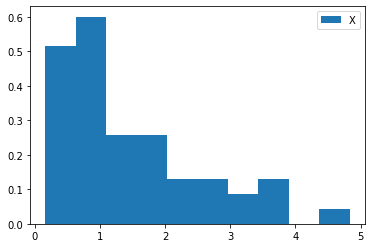

In [3]:
plt.hist(X, normed=True, label="X")
plt.legend()

In [4]:
n = len(X)
B = 1000

In [5]:
xb = np.random.choice(X, (n, B), replace=True)
xb.shape

(50, 1000)

#### Оценки мат ожидания

In [6]:
mu_hat = xb.mean(axis=0)
mu_hat.shape

(1000,)

#### Оценки дисперсии

In [7]:
sigma_hat = np.zeros(B)
for i in range(B):
    x_i = xb[:, i]
    sigma_hat[i] = math.sqrt(((x_i - mu_hat[i])*(x_i - mu_hat[i])).mean())
sigma_hat.shape

(1000,)

## Нормальный интервал

In [8]:
asym_hat = np.zeros(B)
for i in range(B):
    x_i = xb[:, i]
    asym_hat[i] = ((x_i - mu_hat[i])*(x_i - mu_hat[i])*(x_i - mu_hat[i])).mean() / math.pow(sigma_hat[i], 3)
asym_hat.shape

(1000,)

In [9]:
asym_hat = np.sort(asym_hat)
asym_hat

array([0.37851398, 0.39081995, 0.41863194, 0.43223096, 0.43739111,
       0.46342789, 0.47948207, 0.49414762, 0.50827397, 0.52228433,
       0.52343713, 0.527671  , 0.52974419, 0.53379319, 0.53998543,
       0.54303219, 0.54602096, 0.54835903, 0.55099873, 0.5594058 ,
       0.56108936, 0.5624984 , 0.57505924, 0.58166405, 0.58728871,
       0.58816664, 0.59672882, 0.60413101, 0.60735881, 0.60741649,
       0.61581282, 0.61864139, 0.61947882, 0.62331027, 0.62849766,
       0.63038069, 0.63211462, 0.63919622, 0.64674212, 0.64730138,
       0.64752063, 0.6534239 , 0.65796028, 0.66083698, 0.66125643,
       0.66428079, 0.67385657, 0.67434239, 0.6748656 , 0.67686105,
       0.67710055, 0.68040059, 0.68162674, 0.68276797, 0.68308032,
       0.68475544, 0.68778224, 0.68800919, 0.68806309, 0.68817799,
       0.68858885, 0.69045803, 0.69428903, 0.69723243, 0.69774148,
       0.69820371, 0.69864286, 0.6988295 , 0.69929817, 0.70227592,
       0.70242301, 0.7046359 , 0.70537757, 0.71011368, 0.71479

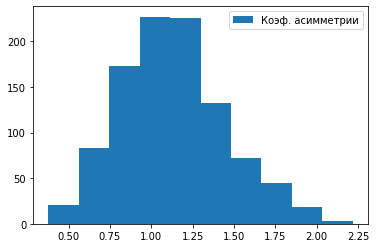

In [10]:
plt.hist(asym_hat, label="Коэф. асимметрии")
plt.legend()

In [11]:
asym_mean = asym_hat.mean()
asym_mean

1.1327327842564041

In [12]:
asym_variance = ((asym_hat - asym_mean)*(asym_hat - asym_mean)).mean()
asym_se_hat = math.sqrt(asym_variance)
asym_variance, asym_se_hat

(0.09934007971833494, 0.315182613286861)

In [18]:
"Нормальный интервал: ({},{})".format(1.1915543539446887 - stats.norm.ppf(1-0.05/2) * asym_se_hat, 1.1915543539446887 + stats.norm.ppf(1-0.05/2) * asym_se_hat)

'Нормальный интервал: (0.5738077833492257,1.8093009245401517)'

## Центральный интервал

In [14]:
x_mean = X.mean()
x_sigma_hat = math.sqrt(((X - x_mean)*(X - x_mean)).mean())
asym = ((X - x_mean)*(X - x_mean)*(X - x_mean)).mean() / math.pow(x_sigma_hat, 3)
asym

1.1915543539446887

In [15]:
lower, upper = np.percentile(asym_hat, [97.5, 2.5])

In [16]:
"Центральный интервал: {}".format([2*asym - lower, 2*asym - upper])

'Центральный интервал: [0.5528792222249623, 1.7949640118268757]'

## Интервал на основе процентилей

In [17]:
"Интервал на основе процентилей: {}".format(np.percentile(asym_hat, [2.5, 97.5]))

'Интервал на основе процентилей: [0.5881447  1.83022949]'